In [ ]:
##Lecture 10

In [2]:
numBuckets = 47  #this is ugly.  We will see a better way soon

def create():
    global numBuckets
    hSet = []
    for i in range(numBuckets):
        hSet.append([])
    return hSet

def hashElem(e):
    global numBuckets
    return e%numBuckets     

def insert(hSet, i):
    hSet[hashElem(i)].append(i)

def remove(hSet, i):
    newBucket = []
    for j in hSet[hashElem(i)]:
        if j != i:
            newBucket.append(j)
    hSet[hashElem(i)] = newBucket

def member(hSet, i):
    return i in hSet[hashElem(i)]

In [11]:
numBuckets = 47
def test1():
    s = create()
    for i in range(40):
        insert(s, i)
    insert(s, 325)
    insert(s, 325)
    insert(s, 987654321)
    print (s)
    print (member(s, 325))
    remove(s, 325)
    print (member(s, 325))
    print (member(s, 987654321))

In [12]:
test1()

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34, 987654321], [35], [36], [37], [38], [39], [], [], [], [325, 325], [], [], []]
True
False
True


In [15]:
numBuckets = 3
def test1():
    s = create()
    for i in range(40):
        insert(s, i)
    insert(s, 325)
    insert(s, 325)
    insert(s, 987654321)
    print (s)
    print (member(s, 325))
    remove(s, 325)
    print (member(s, 325))
    print (member(s, 987654321))

In [16]:
test1()

[[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 987654321], [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 325, 325], [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38]]
True
False
True


In [17]:
numBuckets = 47
def hashElem(e):
    global numBuckets
    if type(e) == int:
        val = e
    if type(e) == str:
        #Convert e to an int
        val = 0
        shift = 0
        for c in e:
            val = val + shift*ord(c)
            shift += 1
    return val%numBuckets

In [18]:
def test2():
    d = create()
    strs = ['ab', 'ba', '32a',
            'big dog', 'small bird']
    for s in strs:
        insert(d, s)
    for i in range(40):
        insert(d, i)
    print (d)
    print (member(d, 'small bird'))
    print (member(d, 'big bird'))
    remove(d, 'small bird')
    print (d)

In [19]:
test2()

[[0], [1], [2], ['ba', 3], ['ab', 4], [5], ['big dog', 6], [7], [8], ['32a', 9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], ['small bird', 30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [], [], [], [], [], [], []]
True
False
[[0], [1], [2], ['ba', 3], ['ab', 4], [5], ['big dog', 6], [7], [8], ['32a', 9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [], [], [], [], [], [], []]


In [1]:
def readVal(valType, requestMsg, errorMsg):
    numTries = 0
    while numTries < 4:
        val = input(requestMsg)
        try:
            val = valType(val)
            return val
        except ValueError:
            print(errorMsg)
            numTries += 1
    raise TypeError('Num tries exceeded')

In [24]:
print (readVal(int, 'Enter int: ', 'Not an int.'))    

Enter int: f
Not an int.
Enter int: d
Not an int.
Enter int: g
Not an int.
Enter int: d
Not an int.


TypeError: Num tries exceeded

In [1]:
try:
   readVal(int, 'Enter int: ', 'Not an int.')
except TypeError(s):
   print (s)


NameError: name 's' is not defined

In [ ]:
#Lecture 11. OOP and Inheritance

In [ ]:
# Abstract data type => interface - explains what methods do to the user; specification => tells what it does
# Underbar-underbar method is automatically envoked when the 
# object type intSet is created
# Clear distinction between specification and implementaion

In [5]:
# Define a new abstract data type
class intSet(object):
    #An intSet is a set of integers
    def __init__(self):
        """Create an empty set of integers"""
        self.numBuckets = 47
        self.vals = []
        for i in range(self.numBuckets):
            self.vals.append([])
        #numBuckets and vals are now attributes of an object of
        # class intSet
        # Self is being used to refer to the object being created
    def hashE(self, e):
        #Private function, should not be used outside of class
        return abs(e)%len(self.vals)

    def insert(self, e):
        """Assumes e is an integer and inserts e into self"""
        for i in self.vals[self.hashE(e)]:
            if i == e:
                 return
        self.vals[self.hashE(e)].append(e)

    def member(self, e):
        """Assumes e is an integer
           Returns True if e is in self, and False otherwise"""
        return e in self.vals[self.hashE(e)]

    def __str__(self):
        """Returns a string representation of self"""
        elems = []
        for bucket in self.vals:
            for e in bucket: elems.append(e)
        elems.sort()
        result = ''
        for e in elems: result = result + str(e) + ','
        return '{' + result[:-1] + '}'

def test1():
    s = intSet()
    for i in range(40):
        s.insert(i)
    print (s.member(14))
    print (s.member(41))
    print (s)
    print (s.vals)  #Evil. Because you are accessing an instance variable in the implemention
                    
    # Data hiding - no direct access. Most important depevelopment that makes
    # abstract data types useful. Java enforces data hiding. 
    #Python does not.
    # We are hiding instance variable: variables associated with each instance of the class
    # Also hiding class variables - see them later
import datetime

In [3]:
s = intSet()
s.numBuckets
print(s.vals)
print(s.vals[5])
print(s,'%%')

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[]
{} %%


In [6]:
test1()

True
False
{0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39}
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [], [], [], [], [], [], []]


In [9]:
import datetime
class Person(object):
    def __init__(self, name):
        #create a person with name name
        self.name = name
        try:
            firstBlank = name.rindex(' ')
            self.lastName = name[firstBlank+1:]
        except:
            self.lastName = name
        self.birthday = None
    def getLastName(self):
        #return self's last name
        return self.lastName
    def setBirthday(self, birthDate):
        #assumes birthDate is of type datetime.date
        #sets self's birthday to birthDate
        assert type(birthDate) == datetime.date
        self.birthday = birthDate
    def getAge(self):
        #assumes that self's birthday has been set
        #returns self's current age in days
        assert self.birthday != None
        return (datetime.date.today() - self.birthday).days
    def __lt__(self, other):
        #return True if self's name is lexicographically greater
        #than other's name, and False otherwise
        if self.lastName == other.lastName:
            return self.name < other.name
        return self.lastName < other.lastName
    def __str__(self):
        #return self's name
        return self.name

In [11]:
me = Person('John Guttag')
him = Person('Barack Hussein Obama')
her = Person('Madonna')
print(him)
print(him.getLastName())
print(me < him)

Barack Hussein Obama
Obama
True


In [13]:
him.setBirthday(datetime.date(1961, 8, 4))
her.setBirthday(datetime.date(1958, 8, 16))
##him.birthday = '8/4/61' Trying to do the evil thing but it fails
print(her.getAge())
print(him.getAge())
print(him < her)
print(me < her)
pList = [me, him, her]
print('The people in pList are:')
for p in pList:
   print('  ' + str(p))

22295
21211
False
True
The people in pList are:
  John Guttag
  Barack Hussein Obama
  Madonna


In [15]:
pList.sort()
print('The people in pList are:')
for p in pList:
   print('  ' + str(p))

The people in pList are:
  John Guttag
  Madonna
  Barack Hussein Obama


In [16]:
# Creating a subclass of Person which:
#   - inherits the properties of superclass
#   - add a property
#   - can overwrite existing property

class MITPerson(Person):
    nextIdNum = 0
    def __init__(self, name):
        Person.__init__(self, name)
        self.idNum = MITPerson.nextIdNum
        MITPerson.nextIdNum += 1
    def getIdNum(self):
        return self.idNum
    def __lt__(self, other):
        return self.idNum < other.idNum
    def isStudent(self):
        return type(self)==UG or type(self)==G

In [18]:
p1 = MITPerson('Barbara Beaver')
print(p1, p1.getIdNum())
p2 = MITPerson('Sue Yuan')
print(p2, p2.getIdNum())
p3 = MITPerson('Sue Yuan')
print (p3, p3.getIdNum())

Barbara Beaver 0
Sue Yuan 1
Sue Yuan 2


In [24]:
p4 = Person('Sue Yuan')
print('p1 < p2 =', p1 < p2)
print('p3 < p2 =', p3 < p2)
print ('_lt__(p1, p2) =', Person.__lt__(p1, p2))
print ('p1 == p4 =', p1 == p4) #Q:why did this work if type(p4) = Person?
print ('p4 < p3 =', p4 < p3)
# print ('p3 < p4 =', p3 < p4)
print(type(p4), type(p1))

p1 < p2 = True
p3 < p2 = False
_lt__(p1, p2) = True
p1 == p4 = False
p4 < p3 = False
<class '__main__.Person'> <class '__main__.MITPerson'>


In [25]:
# Creating a subclass to subclass; continuing the hierarchy
#UG = undergraduate
class UG(MITPerson):
    def __init__(self, name):
        MITPerson.__init__(self, name)
        self.year = None
    def setYear(self, year):
        if year > 5:
            raise OverflowError('Too many')
        self.year = year
    def getYear(self):
        return self.year

ug1 = UG('Jane Doe')
ug2 = UG('Jane Doe')
p3 = MITPerson('Sue Yuan')
print (ug1)
print (ug1 < p3)
print (ug2 < ug1)
print (ug1 == ug2)

Jane Doe
True
False
False


In [29]:
#G = graduate
class G(MITPerson):
    pass  #G is no special, has everything else that an MITPerson has, but now can check if a person
            # is type G

g1 = G('Mitch Peabody')
print(type(g1))
print(type(g1) == G)
print(g1.isStudent())

<class '__main__.G'>
True
True


In [31]:
class CourseList(object):
    def __init__(self, number):
        self.number = number          #gives a list a number
        self.students = []            #creates an empty list in the list
    def addStudent(self, who):
        if not who.isStudent():
            raise TypeError('Not a student')
        if who in self.students:
            raise ValueError('Duplicate student')
        self.students.append(who)
    def remStudent(self, who):
        try:
            self.students.remove(who)
        except:
            print(str(who) + ' not in ' + self.number)
    def allStudents(self):
        for s in self.students:
            yield s
    def ugs(self):
        indx = 0
        while indx < len(self.students):
            if type(self.students[indx]) == UG:
                yield self.students[indx]
            indx += 1

In [42]:
m1 = MITPerson('Barbara Beaver')            
ug1 = UG('Jane Doe')
ug2 = UG('John Doe')
g1 = G('Mitch Peabody')
g2 = G('Ryan Jackson')
g3 = G('Jenny Liu')
print ('')
SixHundred = CourseList('6.00')
print(SixHundred)
SixHundred.addStudent(ug1)
SixHundred.addStudent(g1)
SixHundred.addStudent(ug2)
# SixHundred.addStudent(m1) #Will give an error "not a student"

In [46]:
SixHundred.remStudent(g3)
print ('Students')
for s in SixHundred.allStudents():
    print ("  ", s)

Jenny Liu not in 6.00
Students
   Jane Doe
   Mitch Peabody
   John Doe


In [47]:
print ('Students Squared')
for s in SixHundred.allStudents():
    for s1 in SixHundred.allStudents():
        print (s, s1)

Students Squared
Jane Doe Jane Doe
Jane Doe Mitch Peabody
Jane Doe John Doe
Mitch Peabody Jane Doe
Mitch Peabody Mitch Peabody
Mitch Peabody John Doe
John Doe Jane Doe
John Doe Mitch Peabody
John Doe John Doe


In [40]:
print ('Change Class test')
for s in SixHundred.allStudents():
   print (s)
   if s == ug1:
        SixHundred.remStudent(ug2)
        SixHundred.addStudent(g2)
print ('Undergraduates')
for u in SixHundred.ugs():
    print (u)
L = [1,2,3]
for e in L:
    print (e)
    L = []


Jenny Liu not in 6.00
Students
Jane Doe
Mitch Peabody
John Doe
Students Squared
Jane Doe Jane Doe
Jane Doe Mitch Peabody
Jane Doe John Doe
Mitch Peabody Jane Doe
Mitch Peabody Mitch Peabody
Mitch Peabody John Doe
John Doe Jane Doe
John Doe Mitch Peabody
John Doe John Doe
Change Class test
Jane Doe
Mitch Peabody
Ryan Jackson
Undergraduates
Jane Doe
1
2
3


In [52]:
def test_yield(test_list):
    for i in test_list:
        yield i
test_list = [234,34535,455,989]
for item in test_yield(test_list):
    print(item)

234
34535
455
989


In [ ]:
#Lecture 12. Introduction to Simulation and Random Walks 

# Analytic methods:
#   - predict behaviour, given initial conditions and parameters

# Simulation methods: 
#   usefull for:
#   -hard tp build a model
#   -systems that are not mathematically tractable (e.g., weather forecast)
#   -succesively refining a series of simulations
#   -easier to extract useful intermediate results
#   -computers
#  build a model:
#   -gives useful informaiton about the behaviour of a system
#   -approximation to reality
#   -simulation models are descriptive, not prescriptive


In [ ]:
# Brownian motion is an example of a random walk
# To build a random walk model we need: a drunk, a field, and a location

In [4]:
import random

class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    def getX(self):
        return self.x
    def getY(self):
        return self.y
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [56]:
# A field maps drunks to locations

class Field(object):
    def __init__(self):
        self.drunks = {}    #creates a dictionary of drunks on feild
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc     #drunk is the key, location is the value
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        self.drunks[drunk] = self.drunks[drunk].move(xDist, yDist)
    def getLoc(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [58]:
class Drunk(object):
    def __init__(self, name):
        self.name = name
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)
    def __str__(self):
        return 'This drunk is named ' + self.name

In [62]:
homer = Drunk('homer')
origin = Location(0,0)
f = Field()
f.addDrunk(homer, origin)

In [64]:
def walk(f, d, numSteps):
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return(start.distFrom(f.getLoc(d)))

walk(f, homer, 10)
# the return is random

3.1622776601683795

In [79]:
# Now we wants to record random walks (using simWalks) 
# and statistics for those walks (drunkTest)

def simWalks(numSteps, numTrials):
    homer = Drunk('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(homer, origin)
        distances.append(walk(f, homer, numSteps))
    return distances

def drunkTest(numTrials): 
    for numSteps in [0,1, 10, 100, 1000, 10000, 100000]:
        distances = simWalks(numSteps, numTrials)
        print('Random walk of ' + str(numSteps) + ' steps')
        print('  Mean =', sum(distances)/len(distances))
        print('  Max =', max(distances), 'Min =', min(distances))

In [81]:
drunkTest(200)

Random walk of 0 steps
  Mean = 0.0
  Max = 0.0 Min = 0.0
Random walk of 1 steps
  Mean = 1.0
  Max = 1.0 Min = 1.0
Random walk of 10 steps
  Mean = 2.69150867119681
  Max = 7.0710678118654755 Min = 0.0
Random walk of 100 steps
  Mean = 8.864257095636303
  Max = 20.0 Min = 0.0
Random walk of 1000 steps
  Mean = 25.053853552842174
  Max = 76.69419795525604 Min = 1.4142135623730951
Random walk of 10000 steps
  Mean = 91.06767663427105
  Max = 280.0285699709942 Min = 10.0
Random walk of 100000 steps
  Mean = 265.19013375001873
  Max = 755.7909763949289 Min = 8.94427190999916


In [ ]:
#    *** Lecture #13: Some basic Probability and Plotting data ***

In [15]:
# Copenhagen doctrene; quantum physics; the behaviour of the physical world cannot be predicted
# Heart of the debate between Einstein/Schrodinger (predictive non-determinism, "God does not play dice" 
#         and Bohr/Hiesenberg (for Causal non-determinism). This is still unsettled in science. 
#         Assume the world is non-deterministic, can't predict it.
# Stochastic processes: if it's next state depends both on previous states and some random element


def rollDie():
    """returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

rollDie()

3

In [48]:
# If flip a coin 10 times (binary), you have 2^10 outcomes.
# if roll a die 10 times, get 6^10 outcomes

def testRoll(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

testRoll(10)

2431515122


In [ ]:
import pylab

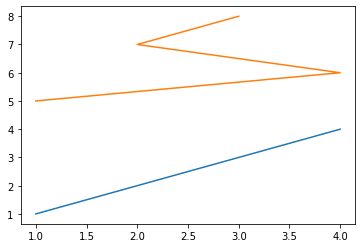

In [28]:
pylab.plot([1,2,3,4], [1,2,3,4])
pylab.plot([1,4,2,3], [5,6,7,8])
pylab.show()  #pylab.show() should only be excecuted once per program and should always be the last 
              #        thing you do because it may hang

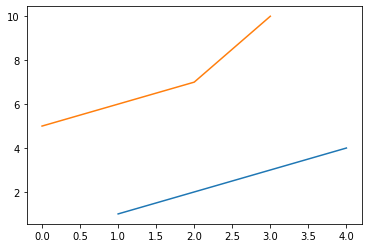

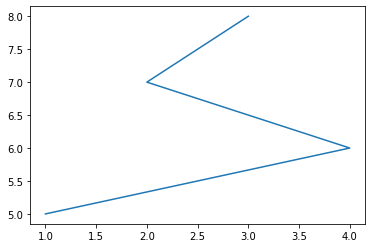

In [43]:
pylab.figure(1)
pylab.plot([1,2,3,4], [1,2,3,4])
pylab.savefig('secondSaved') #saves figure 1
pylab.figure(2)
pylab.plot([1,4,2,3], [5,6,7,8])
pylab.savefig('firstSaved') #saves figure 2
pylab.figure(1)
pylab.plot([5,6,7,10])    #if you give only one arguments, it assumes it's the y-values, and adds (0,1,2,3.. ) for x=axis
pylab.savefig('secondSaved')  #saves figure 1 again
pylab.figure(2)
pylab.savefig('Figure 2') #call figure, then either add data or save
pylab.figure(1)
pylab.savefig('Figure 1') 
pylab.show()

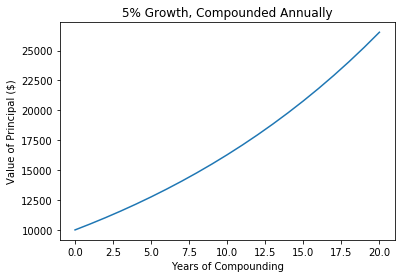

In [45]:
principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate
pylab.plot(values)
pylab.title('5% Growth, Compounded Annually')
pylab.xlabel('Years of Compounding')
pylab.ylabel('Value of Principal ($)')
pylab.show()


In [49]:
#    ***Lecture #14: Sampling and Monte Carlo Simulations***   

In [53]:
# from before:

def rollDie():
    """returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

def testRoll(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [52]:
def checkPascal(numTrials = 100000):
    yes = 0.0
    for i in range(numTrials):
        for j in range(24):
            d1 = rollDie()
            d2 = rollDie()
            if d1 == 6 and d2 == 6:
                yes += 1
                break
    print ('Probability of losing = ' + str(1.0 - yes/numTrials))

checkPascal()

Probability of losing = 0.5078


In [54]:
(35/36)**24

0.5085961238690966

In [ ]:
# Monte Carlo Simulation (1946); example of inferential statistics: a random sample tends to exhibit the same properties
#      as the population from which it is drawn


In [ ]:
def testRoll(numTrials):
    results = [0]*13
    for t in range(numTrials):
        roll = rollDie() + rollDie()
        results[roll] += 1
    probs = pylab.array(results)/float(numTrials)
    pylab.plot(range(2,13), probs[2:13], 'ro')
    pylab.title('Results of Rolling a Pair of Dice')
    pylab.xlabel('Sum of Pair')
    pylab.ylabel('Probability')
    limits = pylab.axis()
    limits = (1, 13, 0, limits[3])
    pylab.axis(limits)

In [26]:
##testRoll(100000)
##pylab.show()
import random 
def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/float(numFlips)

print(flip(5))
print(flip(10))
print(flip(100))
print(flip(100000))

# The Law of Large Numbers (aka Bernoulli Law):
#    In reapeted independent tests, with the same actual probability, p, of an outcome for each test,
#    the chance of that the fraction of times that outcomes occur converges to p as # of trial goes to infinity


0.8
0.6
0.49
0.50237


In [ ]:
def flipSim(numFlipsPerTrial, numTrials):
   fracHeads = []
   for i in range(numTrials):
       fracHeads.append(flip(numFlipsPerTrial))
   mean = sum(fracHeads)/float(len(fracHeads))
   return (mean)

In [5]:
import pylab

In [33]:
%matplotlib qt # to get plots to pop up in a separate window

In [36]:
%matplotlib inline    # to return to not having plots pop up in a separate window

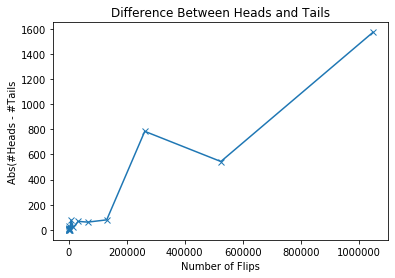

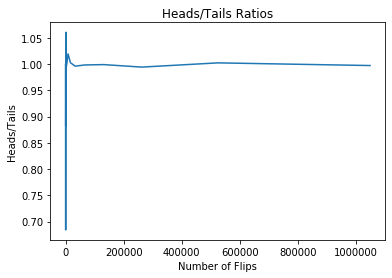

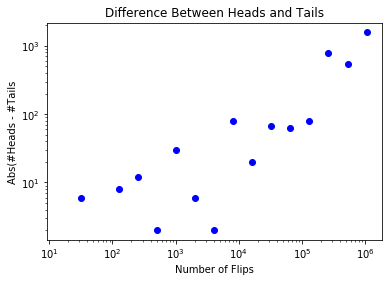

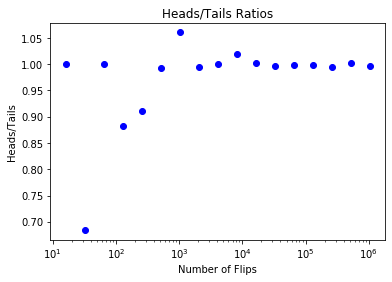

In [6]:
import random

def flipPlot(minExp, maxExp):   #exp is the number of flips
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails')
    pylab.plot(xAxis, diffs, 'x-')
    pylab.figure()
    pylab.plot(xAxis, ratios)
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.figure()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.plot(xAxis, ratios, 'bo') #or '.' for smaller dots
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.semilogx()

flipPlot(4, 20)
pylab.show()

In [ ]:
def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return math.sqrt(tot/len(X))


In [ ]:
#    *** Lecture #15: Statistical Thinking ***  

In [ ]:
# How many samples do we need to believe the answer?
# variance - measure if how much spread there is in the possible outcomes
#    Better to run three trials flipping a coin 300 times each, then
#    one trial of 1 million
#  => standard deviation - measures the fraction of values that are close 
#     to the mean
#       if all values are the same => standard deviation is zero
#  => looking for standard deviation to be low RELATIVE to the mean

In [1]:
import random, pylab

def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5

In [1]:
def flipPlot(minExp, maxExp, numTrials):
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads = 0
            for n in range(numFlips):
                if random.random() < 0.5:
                    numHeads += 1
            numTails = numFlips - numHeads
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    pylab.plot(xAxis, meanRatios, 'bo')
    pylab.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean Heads/Tails')
    pylab.semilogx()
    pylab.figure()
    pylab.plot(xAxis, ratiosSDs, 'bo')
    pylab.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.title('Mean abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean abs(#Heads - #Tails')
    pylab.plot(xAxis, meanDiffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.plot(xAxis, diffsSDs, 'bo')
    pylab.title('SD abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()

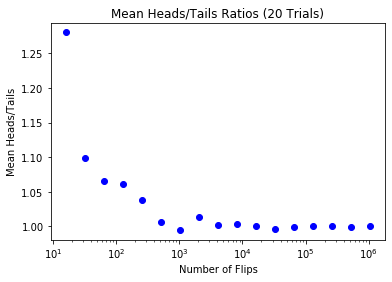

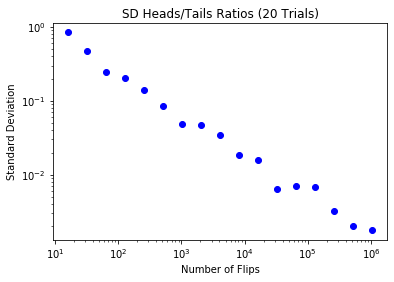

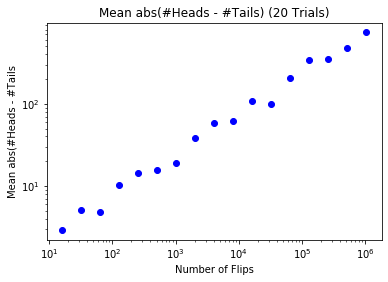

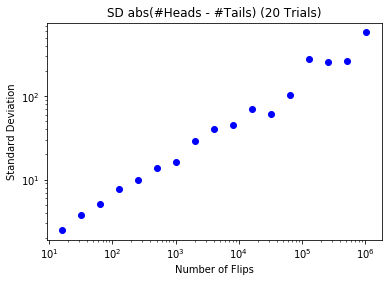

In [4]:
flipPlot(4, 20, 20)
pylab.show()

In [5]:
#  Coefficient of variation = stdev / mean
#       If < 1 => low variance
#                 (but if the mean is close to zero, coefficient of 
#                doesn't have much meaning)
#        => cannot be used for confidence intervals

In [7]:
def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1.0
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    return fracHeads

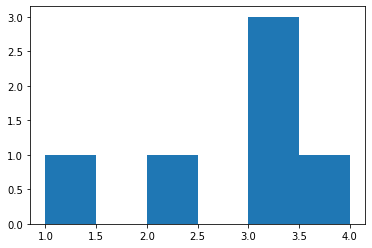

In [3]:
L = [1,2,3,3,3,4]
pylab.hist(L, bins = 6)
pylab.show()

In [4]:
def labelPlot(nf, nt, mean, sd):
    pylab.title(str(nt) + ' trials of '
                + str(nf) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               'Mean = ' + str(round(mean, 6))
               + '\nSD = ' + str(round(sd, 6)))

def makePlots(nf1, nf2, nt):
    """nt = number of trials per experiment
       nf1 = number of flips 1st experiment
       nf2 = number of flips 2nd experiment"""
    fracHeads1 = flipSim(nf1, nt)
    mean1 = sum(fracHeads1)/float(len(fracHeads1))
    sd1 = stdDev(fracHeads1)
    pylab.hist(fracHeads1, bins = 20)
    xmin,xmax = pylab.xlim()  # saving xmin and ymax for use in future plots  
    ymin,ymax = pylab.ylim()
    labelPlot(nf1, nt, mean1, sd1)
    pylab.figure()
    fracHeads2 = flipSim(nf2, nt)
    mean2 = sum(fracHeads2)/float(len(fracHeads2))
    sd2 = stdDev(fracHeads2)
    pylab.hist(fracHeads2, bins = 20)
    pylab.hist(fracHeads2, bins = 20)
    pylab.xlim(xmin, xmax)    # setting xmin and xmax to values from previous figure
    ymin, ymax = pylab.ylim()
    labelPlot(nf2, nt, mean2, sd2)

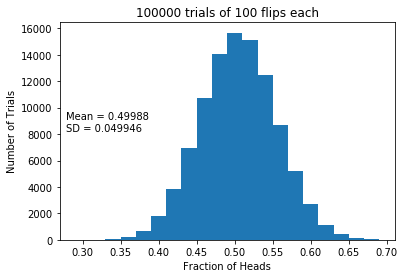

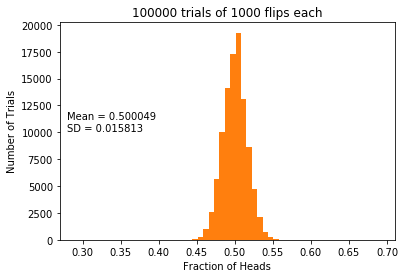

In [8]:
makePlots(100, 1000, 100000)

In [ ]:
# Normal distribution properties: 
#        - always peaks at the mean and falls off symmetrically
#        - the shape looks like a bell(aka bell curve)
# Normal distributions are often used in constructing probabilistic models for two reasons:
#    1) they have nice mathematical properties
#          => can be completely characterized by two parameteres: mean and stdev"
#          => mean and stdev can be used to compute confidence intervals
#   2) many naturally occuring instances
#   Confidence interval - allows to estimates an unknown parameter 
#         by providing a range that is likely to contain an unknown value
#         and a confidence that the unknown value lies within that ranger
#         called the confidence level
#   Empirical rule used for normal distributions: 
#        - 68% of the data are withint 1 stdev of the mean
#        - 95% of the data are within 2 stdev of the mean
#        - 99.7% ---------------------- 3 ----------------
# Gaussian distribution is the same as Normal distribution (Gaus invented it)

In [ ]:
# Can ESTIMATE the stdev (e.g. in polls in preelections)
#    - do so using standard error: an estimate of stdev, can only do this under the assumption that 
#      the assumption that errors are randomly distributed, and that the sample
#      population is small relative to the actual population


std = 1.5836782217357177%


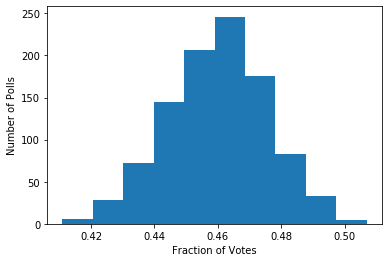

In [11]:
def poll(n, p):
    votes = 0.0
    for i in range(n):
        if random.random() < p/100.0:
            votes += 1
    return votes

def testErr(n = 1000, p = 46.0, numTrials = 1000):
    results = []
    for t in range(numTrials):
        results.append(poll(n, p))
    print('std = ' + str((stdDev(results)/n)*100) + '%')
    results = pylab.array(results)/n
    pylab.hist(results)
    pylab.xlabel('Fraction of Votes')
    pylab.ylabel('Number of Polls')

testErr()
pylab.show()
# estimated standard error was 1.58% (pretty close to 
#                    STDEV when we ran the simulation)

In [ ]:
#     *** Lecture# 16: Using Randomness to Solve Non-random Problems ***

In [ ]:
#  Computational models that will help us understnd the real world
# Uniform distributions : each result is equally probable
#   - occur often in gaming, but not in nature (unlike normal)
# Exponential distributions : eg plan highway system
#    - have a properties of being memoryless


In [1]:
import random, pylab

In [2]:
def clear(n, clearProb, steps):
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-clearProb)**t))
    pylab.plot(numRemaining, label = 'Exponential Decay')

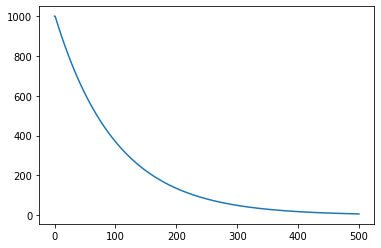

In [14]:
clear(1000, 0.01, 500)
# pylab.semilogy() # will get a straight line if semilog
pylab.show()

In [11]:
# Monte Carlo Simulation of clearing molecules 
import random
def clearSim(n, clearProb, steps):
    numRemaining = [n]
    for t in range(steps):
        numLeft = numRemaining[-1]
        for m in range(numRemaining[-1]):
            if random.random() <= clearProb: 
                numLeft -= 1
#         if t != 0 and t%100 == 0:
#             numLeft += numLeft
        numRemaining.append(numLeft)
    pylab.plot(numRemaining, 'r', label = 'Simulation')

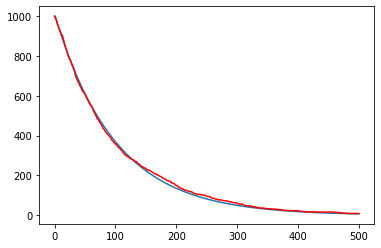

In [12]:
clear(1000, 0.01, 500)    # Analytic model
clearSim(1000, 0.01, 500)  # Simmulation model
pylab.show()

# Fidelity and Credibility vs. Utility (what questions are answerable)
# the advantage of the simmulation model is that you can play what-if game with it. What is the molecules regenerated
# every 1000 steps. See same simulated with uncommented section.

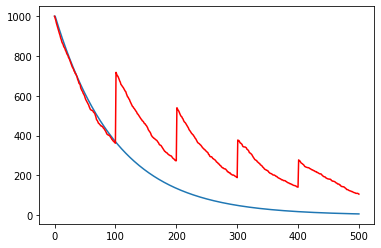

In [14]:
# Monte Carlo Simulation of clearing molecules 
import random
def clearSim(n, clearProb, steps):
    numRemaining = [n]
    for t in range(steps):
        numLeft = numRemaining[-1]
        for m in range(numRemaining[-1]):
            if random.random() <= clearProb: 
                numLeft -= 1
        if t != 0 and t%100 == 0:
            numLeft += numLeft
        numRemaining.append(numLeft)
    pylab.plot(numRemaining, 'r', label = 'Simulation')
    
clear(1000, 0.01, 500)    # Analytic model
clearSim(1000, 0.01, 500)  # Simmulation model
pylab.show()

In [ ]:
# not so easy to describe this analytically

In [ ]:
#  *** Monte Hall Problem ***
# Monte's choice is NOT independent of choice of player. 
# Monte never chooses the door the player picked and DOES not contain the prize!!!
# You DOUBLE the odds of winning if you SWITCH the DOOR choice.

In [16]:
def montyChoose(guessDoor, prizeDoor):
    if 1 != guessDoor and 1 != prizeDoor:
        return 1
    if 2 != guessDoor and 2 != prizeDoor:
        return 2
    return 3

def randomChoose(guessDoor, prizeDoor):
    if guessDoor == 1:
        return random.choice([2,3])
    if guessDoor == 2:
        return random.choice([1,3])
    return random.choice([1,2])
    
def simMontyHall(numTrials = 100, chooseFcn = montyChoose):
    stickWins = 0
    switchWins = 0
    noWin = 0
    prizeDoorChoices = [1, 2, 3]
    guessChoices = [1, 2, 3]
    for t in range(numTrials):
        prizeDoor = random.choice([1, 2, 3])
        guess = random.choice([1, 2, 3])
        toOpen = chooseFcn(guess, prizeDoor)
        if toOpen == prizeDoor:
            noWin += 1
        elif guess == prizeDoor:
            stickWins += 1
        else:
            switchWins += 1
    return (stickWins, switchWins)

def displayMHSim(simResults):
    stickWins, switchWins = simResults
    pylab.pie([stickWins, switchWins], colors = ['r', 'g'],
              labels = ['stick', 'change'], autopct = '%.2f%%')
    pylab.title('To Switch or Not to Switch')

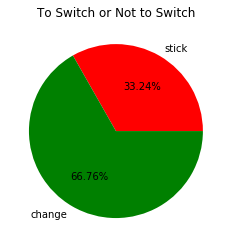

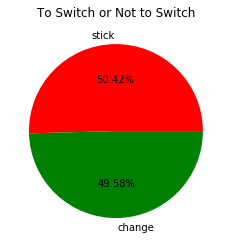

In [17]:
simResults = simMontyHall(100000, montyChoose)
displayMHSim(simResults)
pylab.figure()
simResults = simMontyHall(100000, randomChoose)
displayMHSim(simResults)
pylab.show()

In [22]:
# Dropping Needles to estimate Pi

def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5

def throwNeedles(numNeedles):
    inCircle = 0
    estimates = []
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 4*(inCircle/float(Needles))

def estPi(precision = 0.01, numTrials = 20):
    numNeedles = 1000
    numTrials = 20
    sDev = precision
    while sDev >= (precision/4.0):
        estimates = []
        for t in range(numTrials):
            piGuess = throwNeedles(numNeedles)
            estimates.append(piGuess)
        sDev = stdDev(estimates)
        curEst = sum(estimates)/len(estimates) 
        curEst = sum(estimates)/len(estimates)
        print ('Est. = ' + str(curEst) +\
              ', Std. dev. = ' + str(sDev)\
              + ', Needles = ' + str(numNeedles))
        numNeedles *= 2
    return curEst

In [23]:
estPi()

Est. = 3.1377999999999995, Std. dev. = 0.04809116342947012, Needles = 1000
Est. = 3.1419, Std. dev. = 0.03491403729161095, Needles = 2000
Est. = 3.1437, Std. dev. = 0.02320797276799502, Needles = 4000
Est. = 3.1423750000000004, Std. dev. = 0.01793103106349438, Needles = 8000
Est. = 3.1394749999999996, Std. dev. = 0.007756005737491405, Needles = 16000
Est. = 3.141962500000001, Std. dev. = 0.008269871900458895, Needles = 32000
Est. = 3.1434906250000005, Std. dev. = 0.004460034113869005, Needles = 64000
Est. = 3.1417203124999995, Std. dev. = 0.004704308146446035, Needles = 128000
Est. = 3.1430085937500003, Std. dev. = 0.0037773594234421894, Needles = 256000
Est. = 3.142648046875, Std. dev. = 0.0025421057183277035, Needles = 512000
Est. = 3.1420667968750005, Std. dev. = 0.001315436806889578, Needles = 1024000


3.1420667968750005

In [44]:
random.random()

0.6003733160749611

In [26]:
# Integration

def integrate(a, b, f, numPins):
    pinSum = 0.0
    for pin in range(numPins):
        pinSum += f(random.uniform(a, b))
    average = pinSum/numPins
    return average*(b - a)

def one(x):
    return 1.0

In [28]:
print(integrate(0, 8, one, 100000))

import math
print (integrate(0, 8, math.sin, 1000000))

8.0
1.1461161812342677


In [29]:
def doubleIntegrate(a, b, c, d, f, numPins):
    pinSum = 0.0
    for pin in range(numPins):
        x = random.uniform(a, b)
        y = random.uniform(c, d)
        pinSum += f(x, y)
    average = pinSum/numPins
    return average*(b - a)*(d - c)

def f(x, y):
    return 4 - x**2 - y**2

print (doubleIntegrate(0, 1.25, 0, 1.25, f, 100000))


4.615493991954268


In [ ]:
#   *** Lecture #17: Curve fitting ***

In [6]:
import pylab, random

# Hooks Law Experiment Data 

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

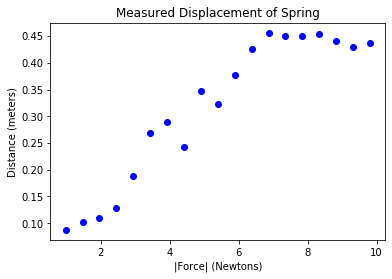

In [5]:
plotData('springData.txt')
pylab.show()

In [ ]:






def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')

##fitData('springData.txt')
##pylab.show()

def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    #pylab.plot(xVals, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(xVals**3) + b*xVals**2 + c*xVals + d
    pylab.plot(xVals, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

fitData1('springData.txt')
pylab.show()

def fitData2(fileName):
    xVals, yVals = getData(fileName)
    extX = pylab.array(xVals + [1.5])
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81
    extX = extX*9.81
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    extY = a*pylab.array(extX) + b
    pylab.plot(extX, extY, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    extY = a*(extX**3) + b*extX**2 + c*extX + d
    pylab.plot(extX, extY, label = 'Cubic fit')
    pylab.legend(loc = 'best')

##fitData2('springData.txt')
##pylab.show()

def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def tryFits(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit')
    pylab.legend()

##tryFits('launcherData.txt')
##pylab.show()

def rSquare(measured, estimated):
    """measured: one dimensional array of measured values
       estimate: one dimensional array of predicted values"""
    EE = ((estimated - measured)**2).sum()
    mMean = measured.sum()/float(len(measured))
    MV = ((mMean - measured)**2).sum()
    return 1 - EE/MV

def tryFits1(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    pylab.legend()

##tryFits1('launcherData.txt')
##pylab.show()

def getXSpeed(a, b, c, minX, maxX):
    """minX and maxX are distances in inches"""
    xMid = (maxX - minX)/2.0
    yPeak = a*xMid**2 + b*xMid + c
    g = 32.16*12 #accel. of gravity in inches/sec/sec
    t = (2.0*yPeak/g)**0.5
    return xMid/(t*12.0)
    #print 'speed = ' + str(int(xMid/(t*12))) + ' feet/sec'

def processTrajectories(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/len(heights)
    pylab.plot(distances, meanHeights, 'bo')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) +  b*distances + c
    speed = getXSpeed(a, b, c, distances[-1], distances[0])
    pylab.plot(distances, altitudes, 'g',
               label = 'Quad. Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 2))
               + ', Speed = ' + str(round(speed, 2)) + 'feet/sec')
    pylab.legend()

##processTrajectories('launcherData.txt')
##pylab.show()

